# Calligaro Nicolas
## Série temporelle
Readme :\
Ce jupyter se concentre sur la gestion des times séries (déjà étudier pour un autre projet).\
utilisation également de ipywidget pour permettre le choix du skipper a étudier.\
Runner l'ensemble du jupyter.\
Remonter jusqu'au choix du skipper, choisir le nom. relancer les cellules en dessous pour avoir d'autres graphiques.

In [1]:
import pandas as pd
import datetime as dt
import pickle
import numpy as np
import seaborn as sns
import ipywidgets as iws
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
df_clas=pickle.Unpickler(open("df_clas.pkl",'rb')).load()
df_tech=pickle.Unpickler(open("df_tech.pkl",'rb')).load()
df_clas.shape,df_tech.shape

((4142, 23), (33, 22))

In [12]:
#on retire les colonnes superflu. on pase la date en index
df_clean= df_clas.drop(df_clas.columns[[1,4,6,7,8,9,10,11,22]],axis=1)
df_time= df_clean.set_index('Date full')

# Optimisation : permettre de choisir le skipper à afficher

In [3]:
choice = iws.Dropdown(
    options=list(df_tech.Skipper),
    value=list(df_tech.Skipper)[0],
    description='Choix du Skipper:',
    disabled=False,
)
display(choice)

Dropdown(description='Choix du Skipper:', options=('jean le cam', 'armel tripon', 'sebastien simon', 'nicolas …

In [4]:
#on groupe sur le numéro de voir pour avoir un groupby par skipper.
skipper = df_tech[df_tech.Skipper == choice.value].index[0]
df_group= df_time.groupby('Num_voile')
df_group.ngroups
df_group.get_group(skipper)
print(f"Skipper étudié : {choice.value} avec le numéro de voile : {skipper}")

Skipper étudié : jean le cam avec le numéro de voile : 1


# Evolution de stat (distance parcouru, vitesse) par jour pour un skipper

In [5]:
df = df_group.get_group(skipper)

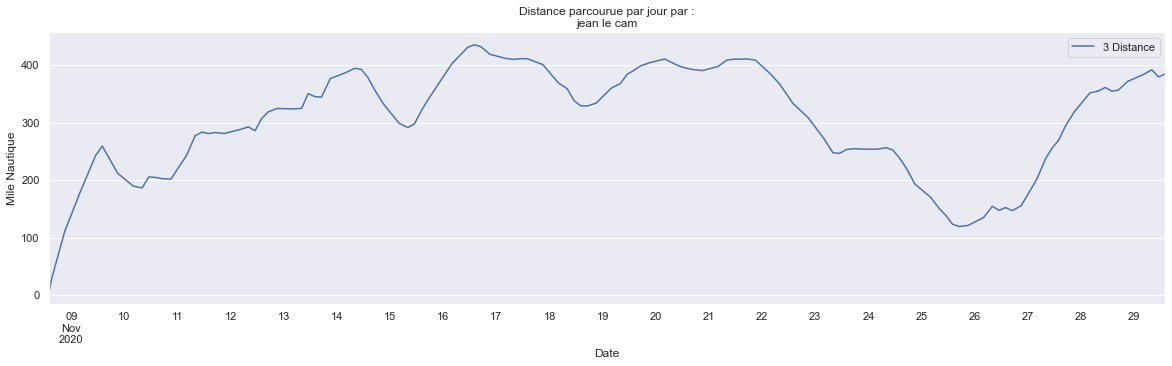

In [6]:
#Distance parcourus extrapolé à l'heure
df['3 Distance'].resample('H').mean().interpolate().plot(figsize=(20,5)
                                                         ,title=f"Distance parcourue par jour par :\n{df['Skipper'].unique()[0]}".capitalize()
                                                         ,legend=True
                                                         ,xlabel='Date'
                                                         ,ylabel='Mile Nautique'
                                                        );

#### On peut voir l'évolution de la distance parcouru par notre skipper. Montrant les jours où il avance bien par rapport à d'autre.

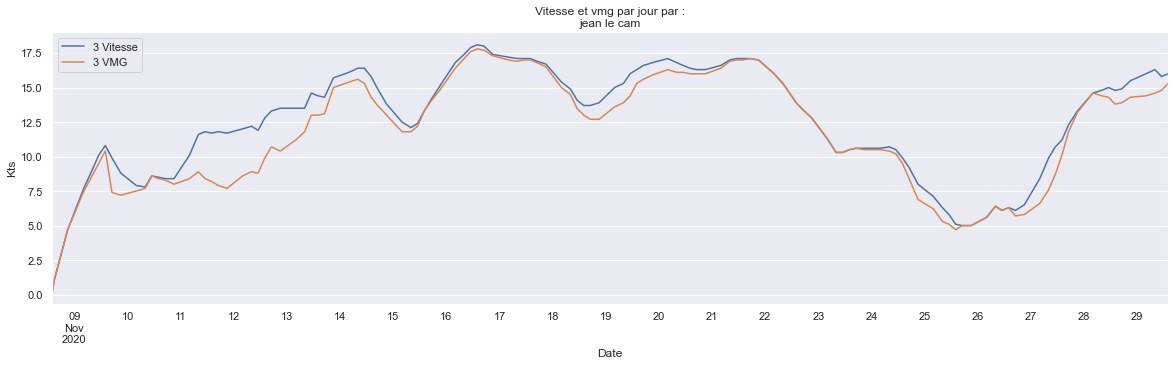

In [7]:
df[['3 Vitesse','3 VMG']].resample('H').mean().interpolate().plot(figsize=(20,5)
                                                         ,title=f"Vitesse et VMG par jour par :\n{df['Skipper'].unique()[0]}".capitalize()
                                                         ,legend=True
                                                         ,xlabel='Date'
                                                         ,ylabel='Kts'
                                                        );

#### On peut voir l'évolution de la vitesse de notre skipper. L'écart entre les deux courbes nous montre quand le skipper suit une bonne trajectoire ou non.

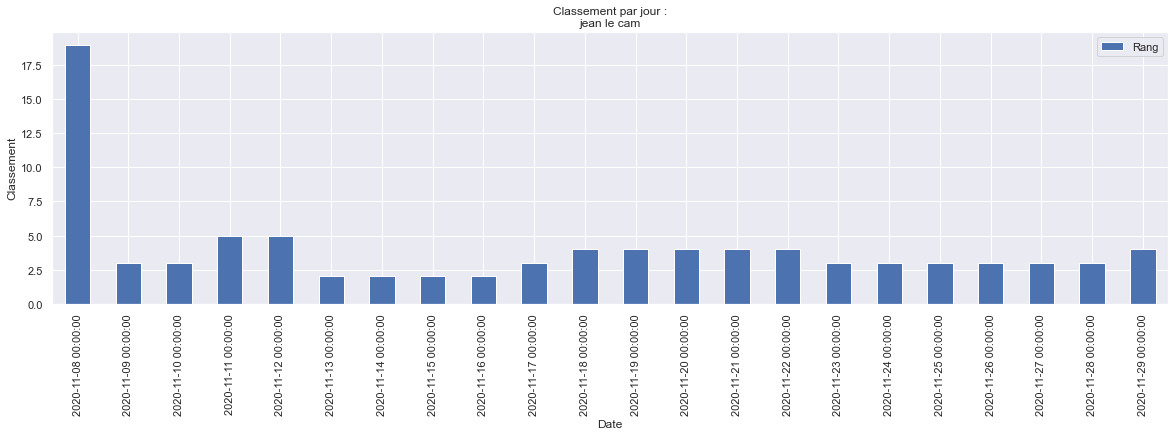

In [8]:
df['Rang'].resample('D').max().plot(kind='bar'
                                   ,figsize=(20,5)
                                   ,title=f"Classement par jour :\n{df['Skipper'].unique()[0]}".capitalize()
                                   ,legend=True
                                   ,xlabel='Date'
                                   ,ylabel='Classement'
                                   );

# Journée typique d'un skipper

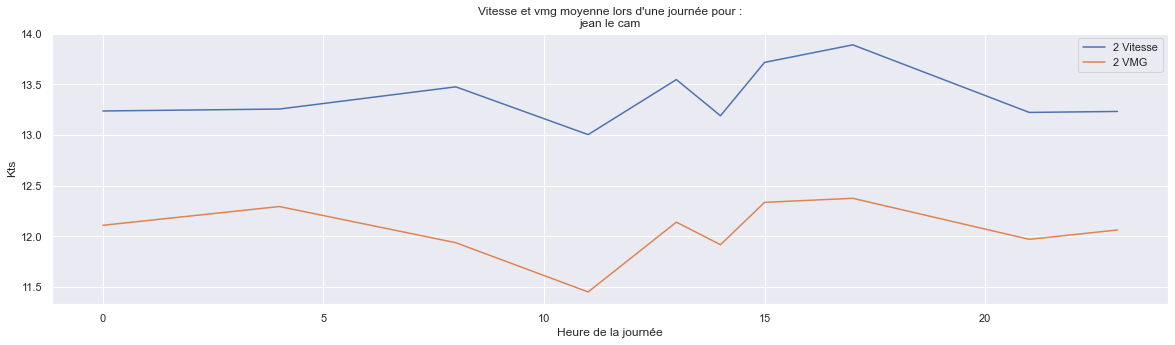

In [9]:
#On recréer l'index avec une ligne par heure. on remplit les na en décallant les données du haut vers le bas.
df1= df.resample('H').interpolate()
#On regroupe toutes les journées par heure et on en prend la moyenne
df2= df1.groupby(df1.index.hour).mean()
#On a ainsi une journée typique d'un skipper
df2[['2 Vitesse','2 VMG']].plot(figsize=(20,5)
                                ,title=f"Vitesse et VMG moyenne lors d'une journée pour :\n{df['Skipper'].unique()[0]}".capitalize()
                                ,legend=True
                                ,xlabel='Heure de la journée'
                                ,ylabel='Kts'
                                #,subplots= True
                               );

#### On affiche une journée typique d'un skipper. on peut voir le cycle jour nuit. ainsi qu'une phase d'activité et de vent favorable. l'écart entre les deux courbes nous montre quand le skipper arrive a suivre le vent

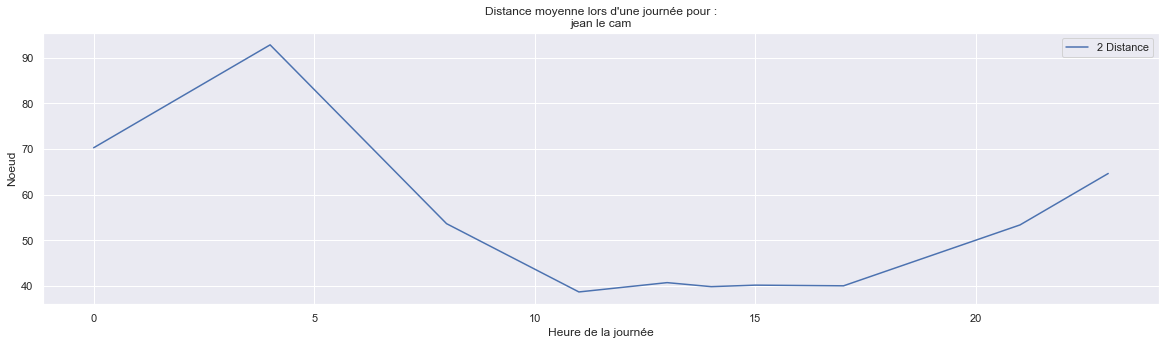

In [10]:
df2['2 Distance'].plot(figsize=(20,5)
                                ,title=f"distance moyenne lors d'une journée pour :\n{df['Skipper'].unique()[0]}".capitalize()
                                ,legend=True
                                ,xlabel='Heure de la journée'
                                ,ylabel='Noeud');

# Courbe de densité de la vitesse pour un skipper

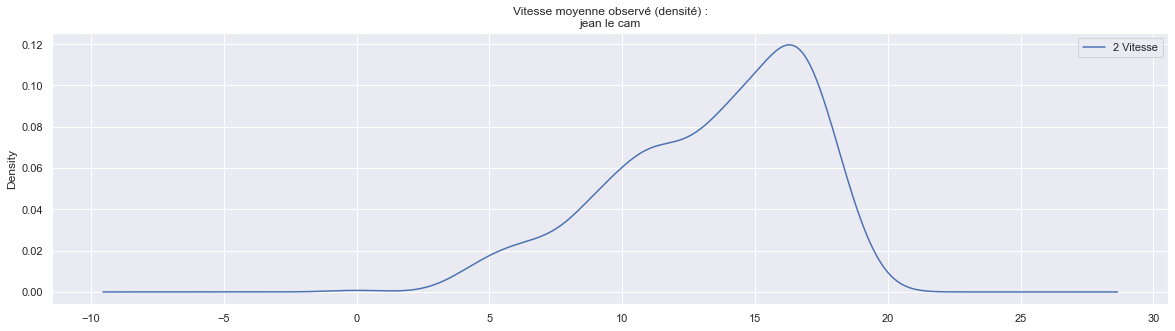

In [11]:
df['2 Vitesse'].resample('H').interpolate().plot(kind ='kde'
                                                         ,figsize=(20,5)
                                                         ,title=f"Vitesse moyenne observé (densité) :\n{df['Skipper'].unique()[0]}".capitalize()
                                                         ,legend=True
                                                         ,xlabel='Date'
                                                         ,ylabel='Mile Nautique'
                                                        );

#### On peut voir la répartition de la vitesse de notre skipper